<a href="https://colab.research.google.com/github/kavyasridandu02/Prodigy_ML01/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Predictor using Linear Regression Model

**Import** **all** **the** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Fixed the typo here
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,QuantileTransformer

**Loading** **the** **dataset**

In [ ]:
traindf=pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
testdf=pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

In [ ]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
testdf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
traindf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
numeric_df=traindf.select_dtypes(include=[np.number])
correlation_matrix=numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [ ]:
req_tr=['GarageArea','OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','SalePrice']


In [ ]:
selected_tr = traindf[req_tr]

In [ ]:
selected_tr.loc[:, 'TotalBath'] = selected_tr['BsmtFullBath'] + selected_tr['BsmtHalfBath'] + selected_tr['FullBath'] + selected_tr['BsmtHalfBath']
selected_tr.loc[:, 'TotalSF'] = selected_tr['GrLivArea'] + selected_tr['TotalBsmtSF'] + selected_tr['GarageArea']

<ipython-input-11-220c5759c0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalBath'] = selected_tr['BsmtFullBath'] + selected_tr['BsmtHalfBath'] + selected_tr['FullBath'] + selected_tr['BsmtHalfBath']
<ipython-input-11-220c5759c0bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:, 'TotalSF'] = selected_tr['GrLivArea'] + selected_tr['TotalBsmtSF'] + selected_tr['GarageArea']


In [ ]:
selected_tr

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,3,3114
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,4,2984
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,3,3314
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,3115
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,3,4179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,2,3060
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,4115
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,3744
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,2396


**Keeping** **only** **the** **necessary** **columns**

In [ ]:
traindf=selected_tr[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual','SalePrice']]

In [ ]:
traindf

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual,SalePrice
0,8,3,548,3114,7,208500
1,6,4,460,2984,6,181500
2,6,3,608,3314,7,223500
3,7,2,642,3115,7,140000
4,9,3,836,4179,8,250000
...,...,...,...,...,...,...
1455,7,2,460,3060,6,175000
1456,7,3,500,4115,6,210000
1457,9,2,252,3744,7,266500
1458,5,2,240,2396,5,142125


**Splitting** **the** **dataset**

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(traindf,test_size=0.2,random_state=42)
print((len(train_set)),(len(test_set)))

1168 292


In [ ]:
housing=train_set.drop('SalePrice',axis=1)
housing_labels=train_set['SalePrice'].copy()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [ ]:
x_train=my_pipeline.fit_transform(housing)


In [ ]:
x_train

array([[-0.96456591, -0.14493995, -0.86383727, -0.14967586, -0.82044456],
       [ 0.27075534, -0.14493995, -0.45626397, -0.32914468, -0.08893368],
       [-1.58222654, -1.38063239, -2.25716927, -1.53742891, -0.82044456],
       ...,
       [-0.96456591, -0.14493995,  0.45366713, -0.79868518, -0.82044456],
       [ 0.27075534, -1.38063239, -1.23349678, -0.53365565,  0.64257719],
       [ 0.27075534, -0.14493995,  0.87071888,  0.54524409,  0.64257719]])

In [ ]:
y_train=housing_labels

In [ ]:
y_train.shape

(1168,)

**correlations**

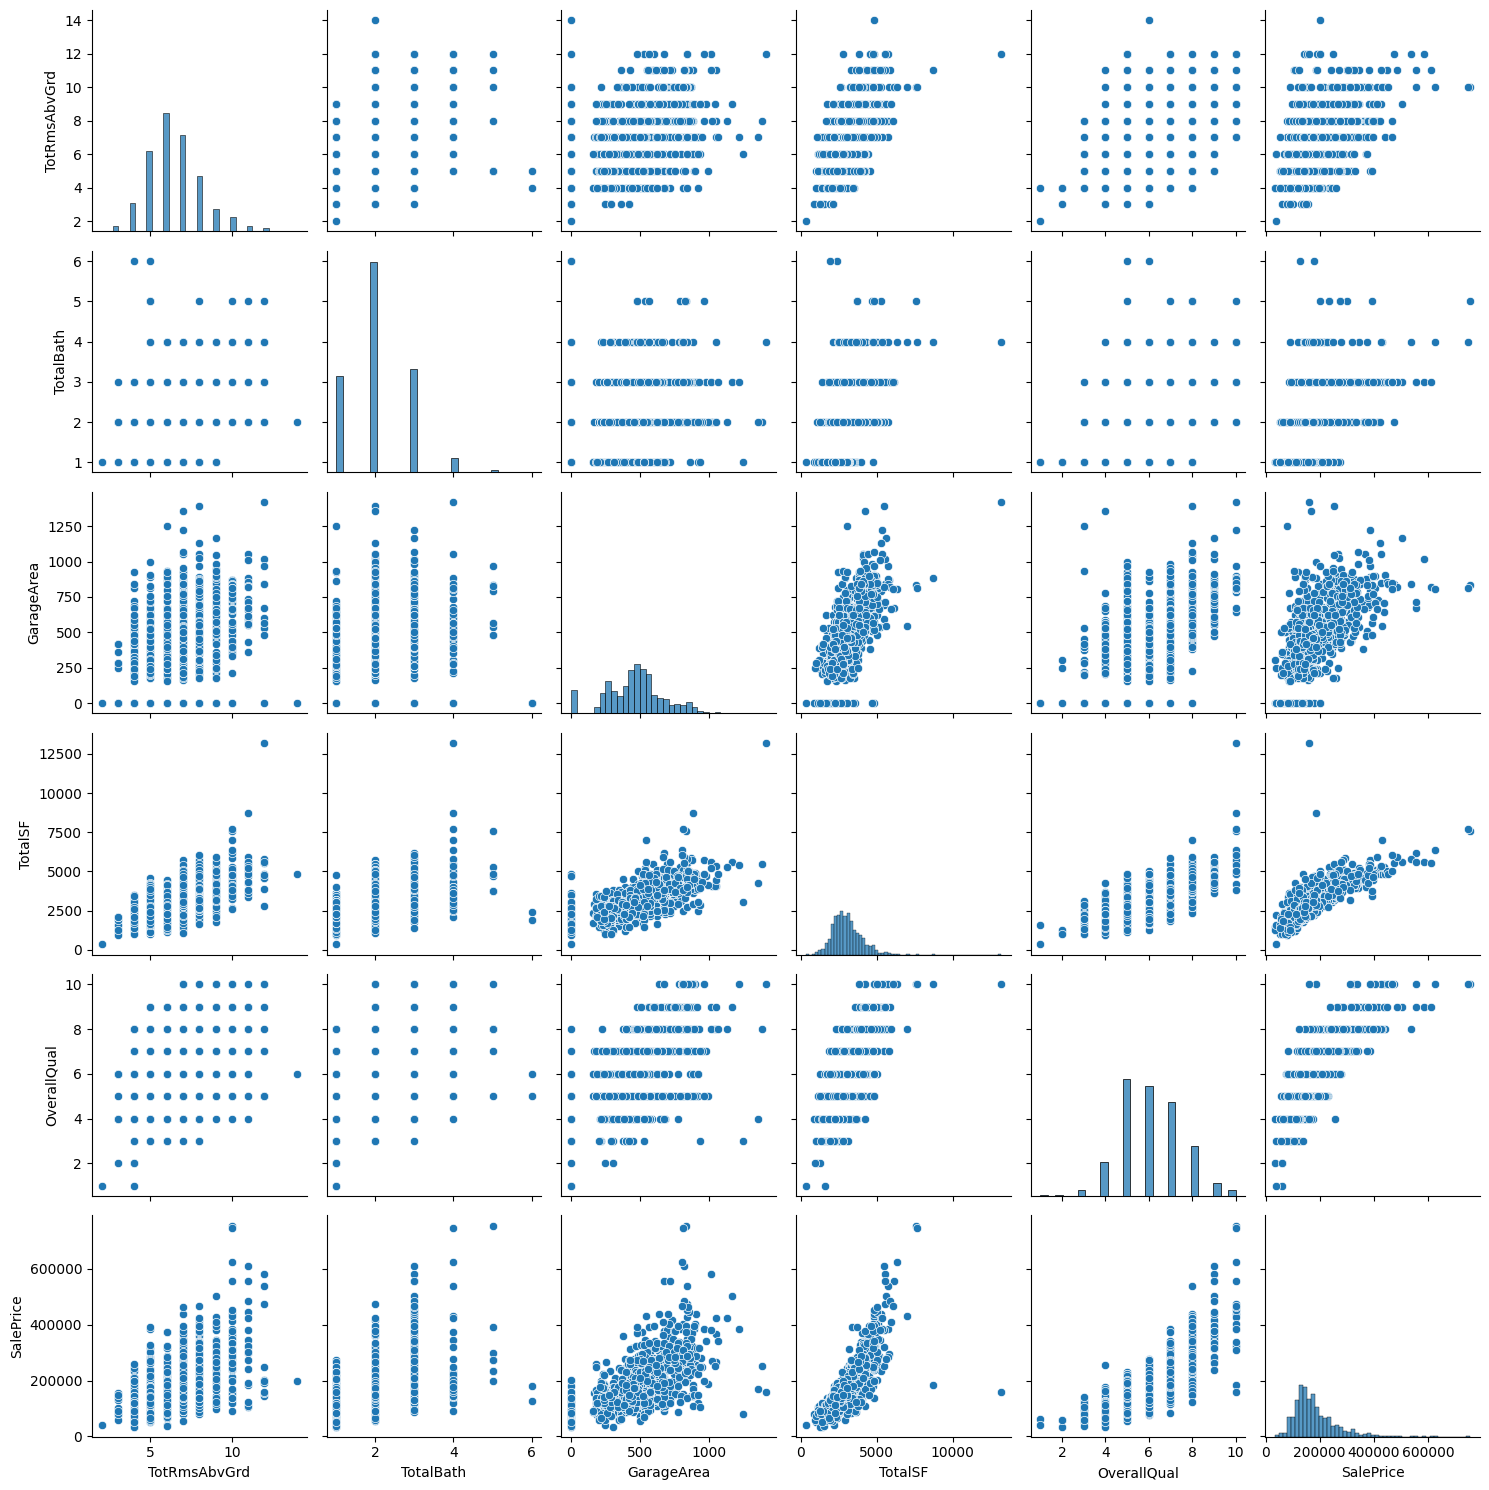

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sns.pairplot(traindf)
plt.tight_layout()
plt.show()



In [ ]:
corr_matrix = traindf.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
TotalSF,0.807518
OverallQual,0.790982
GarageArea,0.623431
TotRmsAbvGrd,0.533723
TotalBath,0.514622


<Axes: >

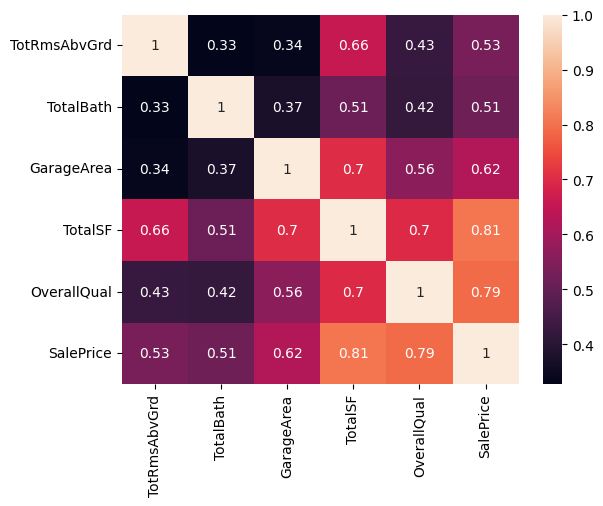

In [ ]:
sns.heatmap(traindf.corr(),annot=True)

**Working** **with** **Test** **DataFrame**

In [ ]:
testdf = pd.read_csv("/content/drive/MyDrive/dataset/test.csv")

In [ ]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
req_tst=['GarageArea','OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd']

In [ ]:
selected_tst = testdf[req_tst]

In [ ]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
                                   selected_tst['BsmtHalfBath'].fillna(0) +
                                   selected_tst['FullBath'].fillna(0) +
                                   selected_tst['BsmtHalfBath'].fillna(0))
selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0)  +
                                 selected_tst['1stFlrSF'].fillna(0) +
                                 selected_tst['2ndFlrSF'].fillna(0) +
                                 selected_tst['LowQualFinSF'].fillna(0) +
                                 selected_tst['GrLivArea'].fillna(0))

<ipython-input-29-0ba09ab08b8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
<ipython-input-29-0ba09ab08b8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0)  +


In [ ]:
selected_tst

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,TotalBath,TotalSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,1.0,2674.0
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,1.0,3987.0
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,2.0,4186.0
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,2.0,4134.0
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,2.0,3840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,1.0,2730.0
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,1.0,2730.0
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,2.0,3672.0
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,3.0,2852.0


In [ ]:
test_df_unproc = selected_tst[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']]

In [ ]:
test_df_unproc

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual
0,5,1.0,730.0,2674.0,5
1,6,1.0,312.0,3987.0,6
2,6,2.0,482.0,4186.0,5
3,7,2.0,470.0,4134.0,6
4,5,2.0,506.0,3840.0,8
...,...,...,...,...,...
1454,5,1.0,0.0,2730.0,4
1455,6,1.0,286.0,2730.0,4
1456,7,2.0,576.0,3672.0,5
1457,6,3.0,0.0,2852.0,5


In [ ]:
test_df = test_df_unproc.fillna(test_df_unproc.mean())

In [ ]:
x_test = my_pipeline.transform(test_df[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']].values)

In [ ]:
x_test

array([[-0.96456591, -1.38063239,  1.2024646 , -0.40844485, -0.82044456],
       [-0.34690528, -1.38063239, -0.77853123,  0.96157   , -0.08893368],
       [-0.34690528, -0.14493995,  0.02713693,  1.16921125, -0.82044456],
       ...,
       [ 0.27075534, -0.14493995,  0.47262403,  0.63289165, -0.82044456],
       [-0.34690528,  1.09075249, -2.25716927, -0.2227155 , -0.82044456],
       [ 1.50607659, -0.14493995,  0.82332664,  2.01438416,  0.64257719]])

**Model** **Selection**

In [ ]:
model = LinearRegression()
model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_train_pred = model.predict(x_train)

In [ ]:
y_train_pred

array([143842.  , 174294.  ,  91986.  , ..., 123385.  , 179078.9 ,
       192718.68])

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]


In [ ]:
proc_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(proc_data)

array([143842. , 174294. ,  91986. , 162152.4, 143561. ])

In [ ]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [ ]:
train_mse = mean_squared_error(y_train,y_train_pred)


In [ ]:
train_rmse = np.sqrt(train_mse)

In [ ]:
print(f"training MSE: {train_mse:.2f}")
print(f"training RMSE: {train_rmse:.2f}")

training MSE: 184098593.31
training RMSE: 13568.29


**Cross** **Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=200)
rmse_scores = np.sqrt(-scores)


In [ ]:
rmse_scores

array([ 25722.52638676,  17086.57317042,  29836.95063895,  16129.02498021,
        27703.69532148,  17285.04452888,  16023.67899288,  16746.13588146,
        14524.08773601,  42083.48217944,  25057.77520308,  32046.83745976,
        15932.74340368,  15061.65994272,  20468.15769181,  18745.4157993 ,
        15680.22720091,  29674.79956891,  36537.12614545,  14771.35910672,
        32760.03342323,  21929.20164956,  19773.92861185,  26131.87939073,
        31594.15745174,  18350.53057204,  36137.44968484,  26054.59542561,
       118867.66863873,  48176.5272625 ,  18365.09110063,  32613.83117136,
        16063.38051658,  17739.99098868,  38809.40173835,  20833.52497751,
        22390.3565277 ,  20921.25710212,  10179.94250816,  23470.95210502,
        30107.02367034,  28717.78236297,  33942.68389373,  51421.60266643,
        28225.23305214,  30834.04613003,  23068.03649285,  30986.51888659,
        22226.5562387 ,  25493.64290694,  16260.13505726,  49136.63246156,
        21904.33083226,  

In [ ]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())


In [ ]:
print_scores(rmse_scores)

scores: [ 25722.52638676  17086.57317042  29836.95063895  16129.02498021
  27703.69532148  17285.04452888  16023.67899288  16746.13588146
  14524.08773601  42083.48217944  25057.77520308  32046.83745976
  15932.74340368  15061.65994272  20468.15769181  18745.4157993
  15680.22720091  29674.79956891  36537.12614545  14771.35910672
  32760.03342323  21929.20164956  19773.92861185  26131.87939073
  31594.15745174  18350.53057204  36137.44968484  26054.59542561
 118867.66863873  48176.5272625   18365.09110063  32613.83117136
  16063.38051658  17739.99098868  38809.40173835  20833.52497751
  22390.3565277   20921.25710212  10179.94250816  23470.95210502
  30107.02367034  28717.78236297  33942.68389373  51421.60266643
  28225.23305214  30834.04613003  23068.03649285  30986.51888659
  22226.5562387   25493.64290694  16260.13505726  49136.63246156
  21904.33083226  25868.32952474  27428.87586268  22780.15941896
  17678.53078819  26332.96662855  28997.16309676  32039.29347359
 200992.63735367  

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([143022.  , 213711.7 , 166459.5 , ..., 159324.55, 151868.24,
       289353.37])

In [ ]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('/content/drive/MyDrive/dataset/sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)